<h1 style="color:black; font-weight:bold;"> National Voter Turnout Trend for (1962–2000)</h1>


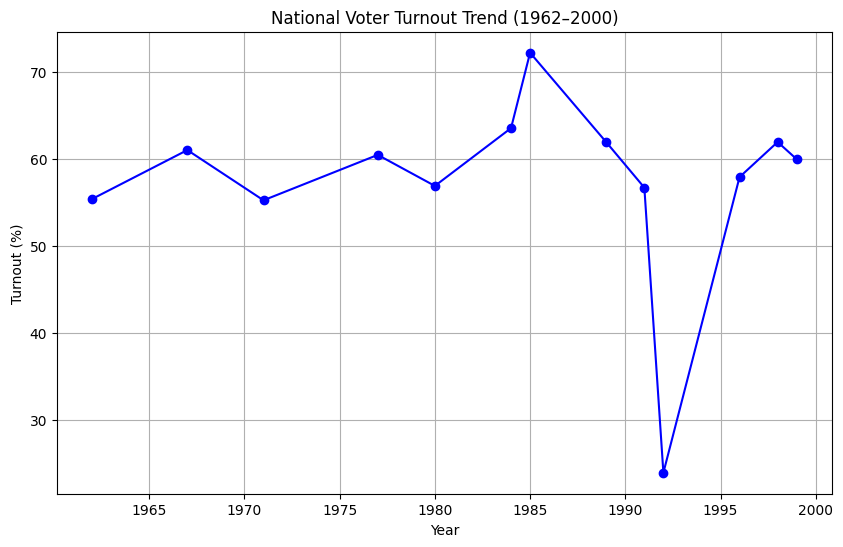

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read the excel file that has election data
df1 = pd.read_excel(r"C:\Users\USER\Downloads\Table43.2-India.xls")

# clean up the 'Year' column and calculate voter turnout percentage
df1["Year"] = df1[" Year"].astype(str).str.strip().astype(int)
df1["Turnout %"] = (df1["Number of votes polled"] / df1["Number of electors"]) * 100

# take only the data between 1962 and 2000
df1_segment = df1[(df1["Year"] >= 1962) & (df1["Year"] <= 2000)]

# make a line plot of the turnout trend
plt.figure(figsize=(10,6))
plt.plot(df1_segment["Year"], df1_segment["Turnout %"], marker="o", color="blue")
plt.title("National Voter Turnout Trend (1962–2000)")
plt.xlabel("Year")
plt.ylabel("Turnout (%)")
plt.grid(True)
plt.show()


# National Voter Turnout Trend (2009–2024)


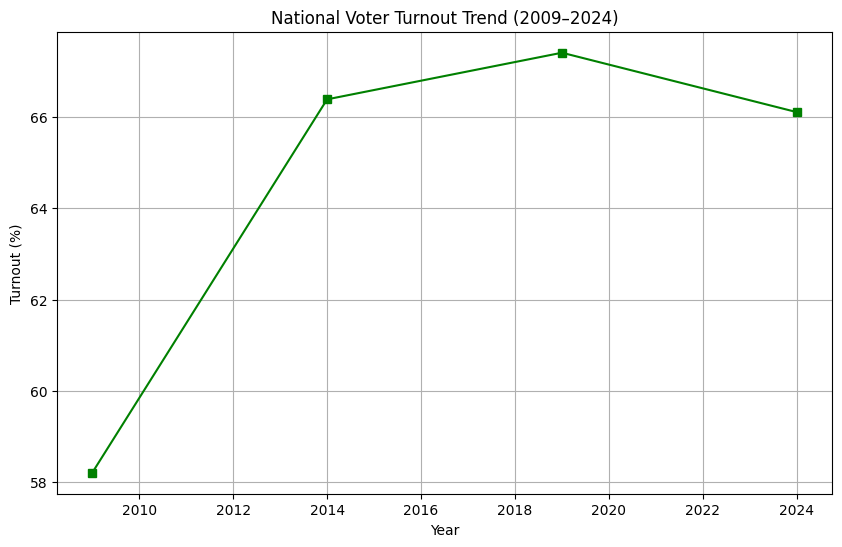

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# create a small dataset with turnout percentages for the latest elections
df_recent = pd.DataFrame({
    "Year": [2009, 2014, 2019, 2024],
    "Turnout %": [58.21, 66.38, 67.40, 66.10]
})

# plot the turnout trend from 2009 up to 2024 without skipping any year
plt.figure(figsize=(10,6))
plt.plot(df_recent["Year"], df_recent["Turnout %"], marker="s", color="green")
plt.title("National Voter Turnout Trend (2009–2024)")
plt.xlabel("Year")
plt.ylabel("Turnout (%)")
plt.grid(True)
plt.show()


# Eligible vs Actual Voters (1962–2024)

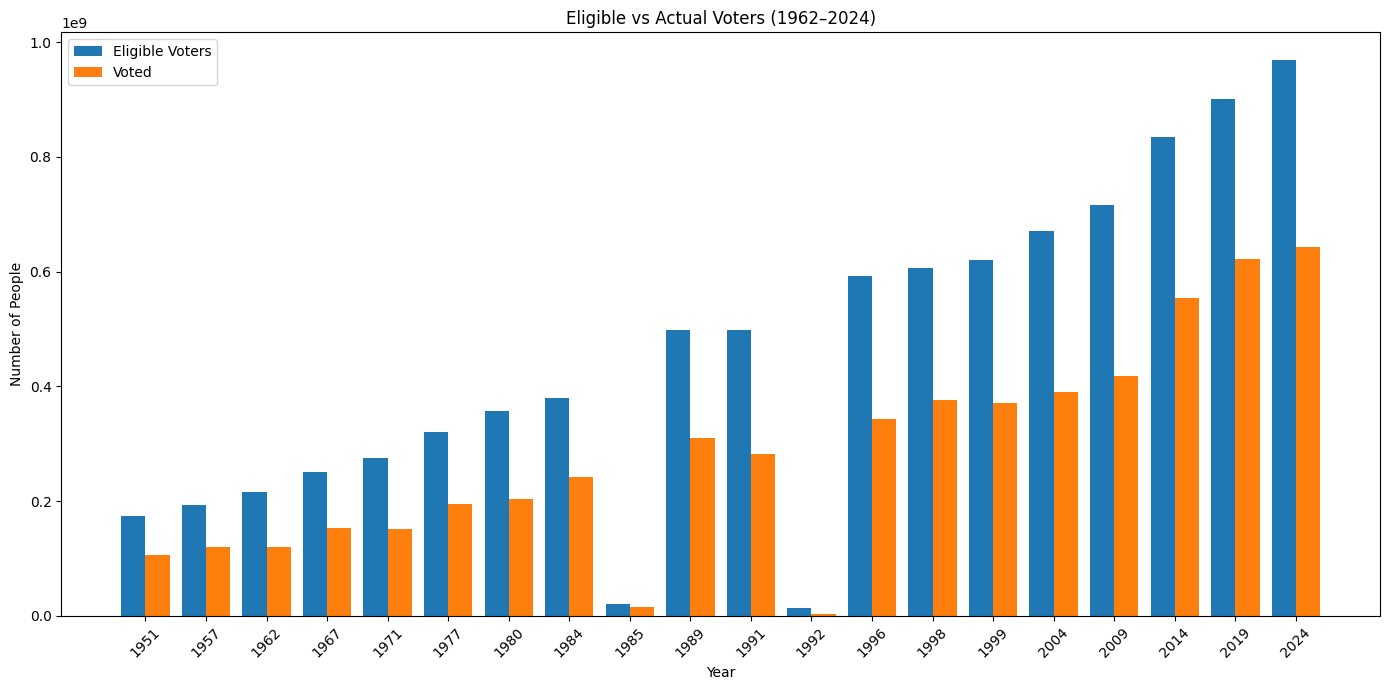

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the two excel files that have election info
df1 = pd.read_excel(r"C:\Users\USER\Downloads\Table43.2-India.xls")
df2 = pd.read_excel(r"C:\Users\USER\Downloads\datafile.xlsx")

# cleaning the first dataset and keeping only Year, Eligible voters, and Voted countsdf1.columns = df1.columns.str.strip()
df1_part = df1[["Year", "Number of electors", "Number of votes polled"]].copy()
df1_part.rename(columns={
    "Number of electors": "Eligible",
    "Number of votes polled": "Voted"
}, inplace=True)

# adding the more recent national election data (2014, 2019, 2024) manually
extra_years = [2014, 2019, 2024]
extra_eligible = [834101479, 900999694, 968841345]  # replace with official ECI values if available
extra_voted = [554716327, 622759267, 642230000]     # replace with official ECI values if available

df2_extra = pd.DataFrame({
    "Year": extra_years,
    "Eligible": extra_eligible,
    "Voted": extra_voted
})

# joining the old dataset with the manually added recent years
df_all = pd.concat([df1_part, df2_extra], ignore_index=True)

# preparing data for plotting: years, eligible voters, and voted numbers
years = df_all["Year"]
eligible = df_all["Eligible"]
voted = df_all["Voted"]

# bar chart comparing eligible vs voted counts across all years
x = range(len(years))
plt.figure(figsize=(14,7))

plt.bar([i - 0.2 for i in x], eligible, width=0.4, label="Eligible Voters")
plt.bar([i + 0.2 for i in x], voted, width=0.4, label="Voted")

plt.xticks(x, years, rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("Eligible vs Actual Voters (1962–2024)")
plt.legend()
plt.tight_layout()
plt.show() 

# Predicted Eligible vs Voted Voters (Next 5 Elections)

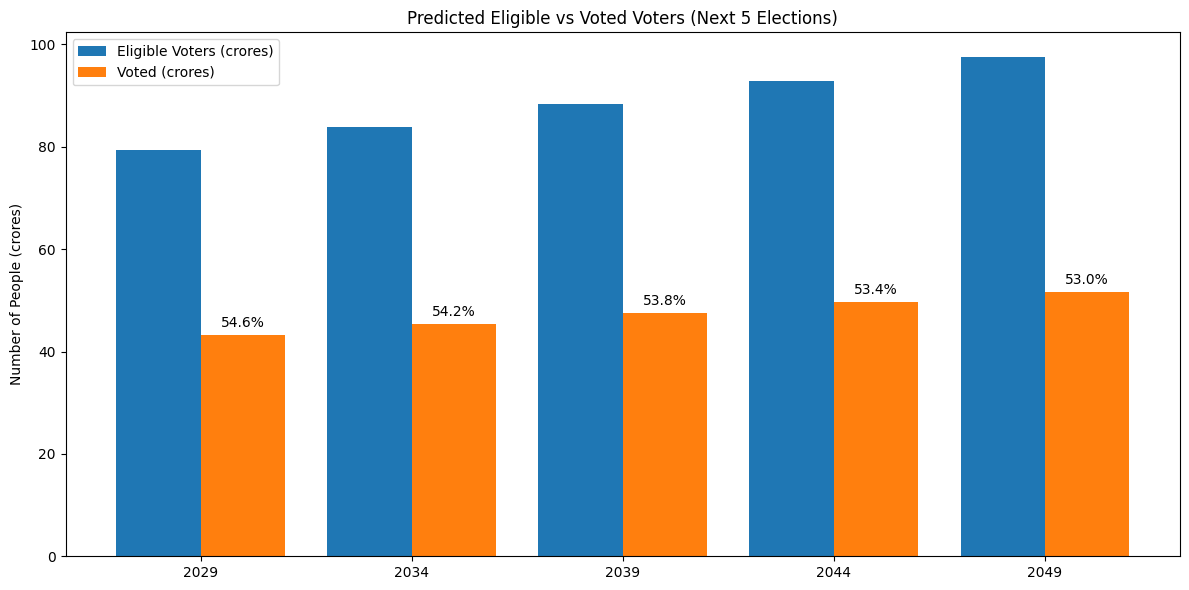

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# ------------------------------
# Step 1: cleaning up the dataset by fixing column names
# ------------------------------
df1.rename(columns=lambda x: x.strip(), inplace=True)

df1.rename(columns={
    "Number of electors": "Eligible",
    "Number of votes polled": "Voted",
    "Year": "Year"
}, inplace=True)

# converting voter numbers into crores for easy reading
df1["Eligible_crores"] = df1["Eligible"] / 1e7
df1["Voted_crores"] = df1["Voted"] / 1e7

# ------------------------------
# Step 2:  Calculating voter turnout percentage
# ------------------------------
df1["Turnout_percent"] = (df1["Voted_crores"] / df1["Eligible_crores"]) * 100

# ------------------------------
# Step 3: Training a linear regression model to guess future eligible voters
# ------------------------------
X = df1[["Year"]].values
y_eligible = df1["Eligible_crores"].values

model_eligible = LinearRegression().fit(X, y_eligible)
# years we want predictions for
future_years = np.array([2029, 2034, 2039, 2044, 2049]).reshape(-1,1)
pred_eligible = model_eligible.predict(future_years)

# ------------------------------
# Step 4: Building another model to estimate future turnout percentages
# ------------------------------
y_turnout = df1["Turnout_percent"].values
model_turnout = LinearRegression().fit(X, y_turnout)

pred_turnout = model_turnout.predict(future_years)

# ------------------------------
# Step 5: Using predicted eligible * turnout% to get predicted voted counts
# ------------------------------
pred_voted = pred_eligible * (pred_turnout/100)

# ------------------------------
# Step 6: Plotting the predictions for the next 5 elections
# ------------------------------
plt.figure(figsize=(12,6))
x = np.arange(len(future_years))

plt.bar(x - 0.2, pred_eligible, width=0.4, label="Eligible Voters (crores)")
plt.bar(x + 0.2, pred_voted, width=0.4, label="Voted (crores)")

# adding turnout percentages on top of the voted bars
for i, (vot, t) in enumerate(zip(pred_voted, pred_turnout)):
    plt.text(i + 0.2, vot + 1, f"{t:.1f}%", ha="center", va="bottom", fontsize=10, color="black")

plt.xticks(x, [str(y[0]) for y in future_years])
plt.ylabel("Number of People (crores)")
plt.title("Predicted Eligible vs Voted Voters (Next 5 Elections)")
plt.legend()
plt.tight_layout()
plt.show()


# State-wise Average Voter Turnout (2000–2024)

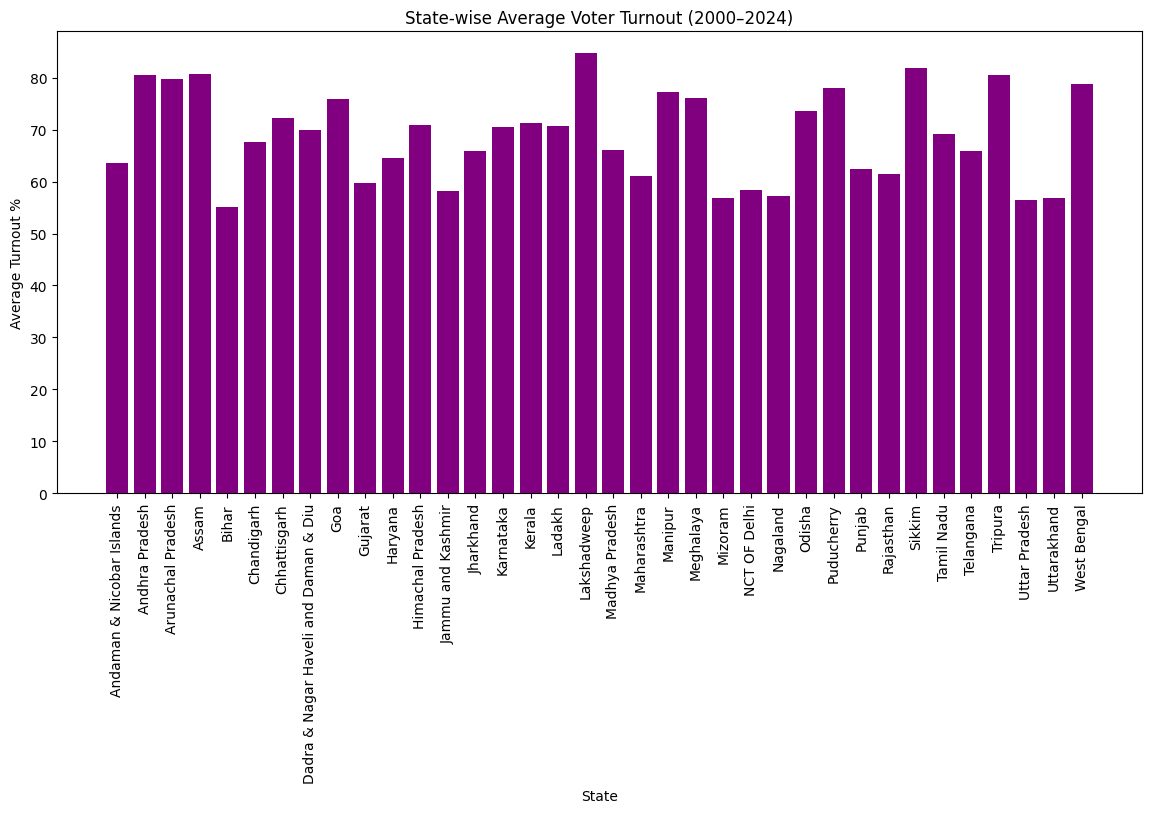

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the excel sheet that has state-level election data
df = pd.read_excel(r"C:\Users\USER\Downloads\datafile.xlsx")

# calculating turnout percentage for each record
df["Turnout %"] = (df["TOTAL_VALID_VOTES_POLLED_IN_THE_STATE"] / df["TOTAL_ELECTORS_IN_THE_STATE"]) * 100

# finding the average turnout percentage for every state
statewise = df.groupby("STATE_NAME")["Turnout %"].mean().reset_index()

# making a bar chart to compare average turnout state by state
plt.figure(figsize=(14,6))
plt.bar(statewise["STATE_NAME"], statewise["Turnout %"], color="purple")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Turnout %")
plt.title("State-wise Average Voter Turnout (2000–2024)")
plt.show()


# State-wise Predicted Voter Turnout (Next 10 Elections)

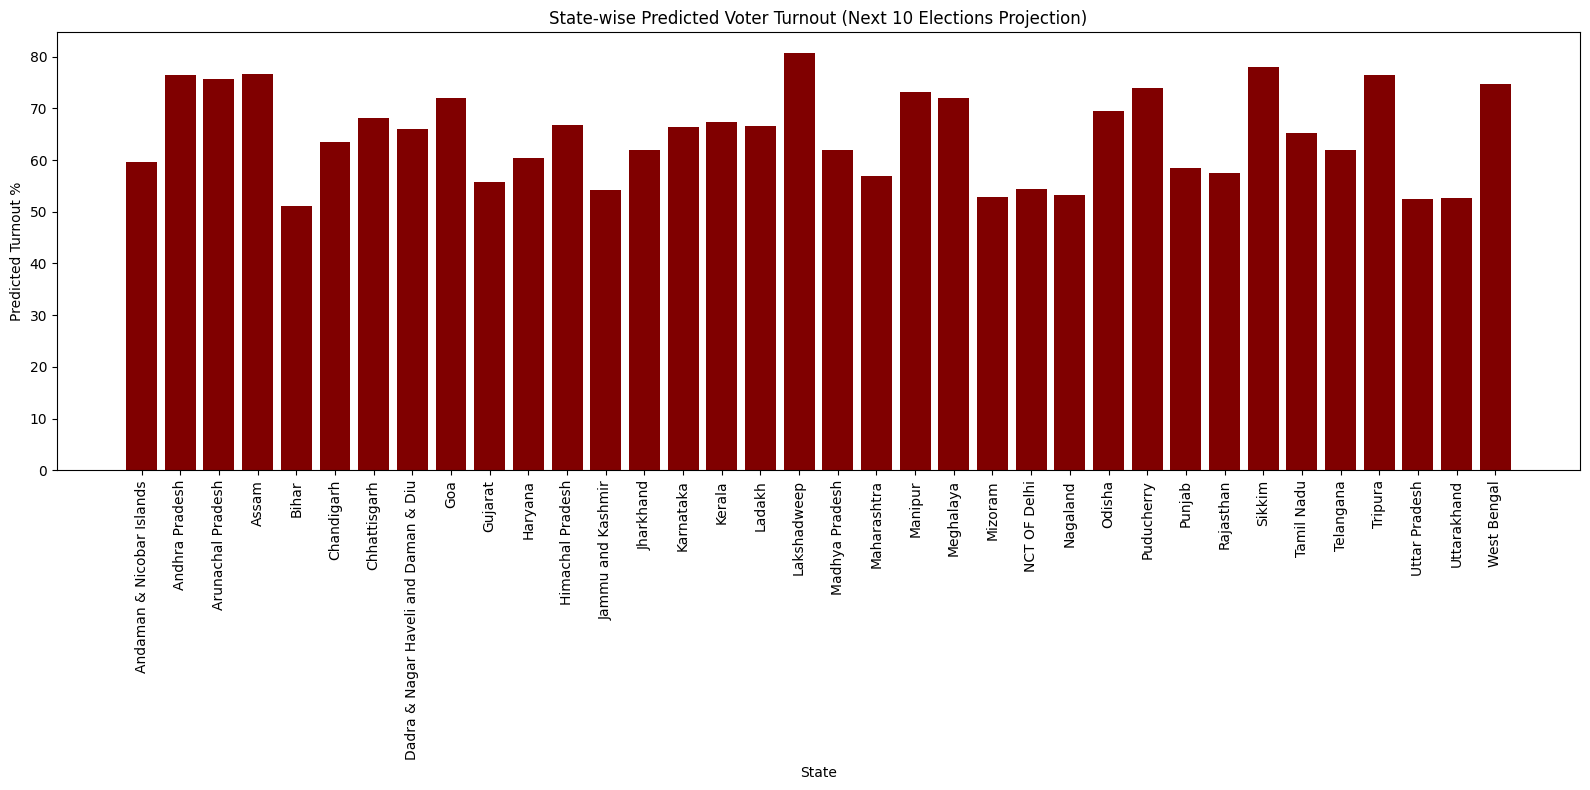

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# bringing in the dataset that has state-level voting details
df = pd.read_excel(r"C:\Users\USER\Downloads\datafile.xlsx")

# Step 1: calculating the average turnout % for each state based on past data
turnout_df = (
    df.groupby("STATE_NAME")[["TOTAL_VALID_VOTES_POLLED_IN_THE_STATE", "TOTAL_ELECTORS_IN_THE_STATE"]]
    .mean()
    .reset_index()
)

turnout_df["Average Turnout %"] = (
    turnout_df["TOTAL_VALID_VOTES_POLLED_IN_THE_STATE"] 
    / turnout_df["TOTAL_ELECTORS_IN_THE_STATE"]
) * 100

# Step 2: # calculating the average turnout % for each state based on past data
decline_rate = -0.4  # decline per election
num_future_elections = 10

# making future turnout predictions for the next 10 elections
future_turnout = []
for i in range(1, num_future_elections + 1):
    future_turnout_df = turnout_df.copy()
    future_turnout_df["Predicted Turnout %"] = future_turnout_df["Average Turnout %"] + (decline_rate * i)
    future_turnout_df["Election"] = f"Election +{i}"
    future_turnout.append(future_turnout_df)

future_turnout = pd.concat(future_turnout)

# Step 3: # drawing a bar chart only for the last prediction (10th election ahead)
plt.figure(figsize=(16, 8))
subset = future_turnout[future_turnout["Election"] == "Election +10"]
plt.bar(subset["STATE_NAME"], subset["Predicted Turnout %"], color="maroon")

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Predicted Turnout %")
plt.title("State-wise Predicted Voter Turnout (Next 10 Elections Projection)")
plt.tight_layout()
plt.show()


# Turnout Prediction – Normal vs With Bots

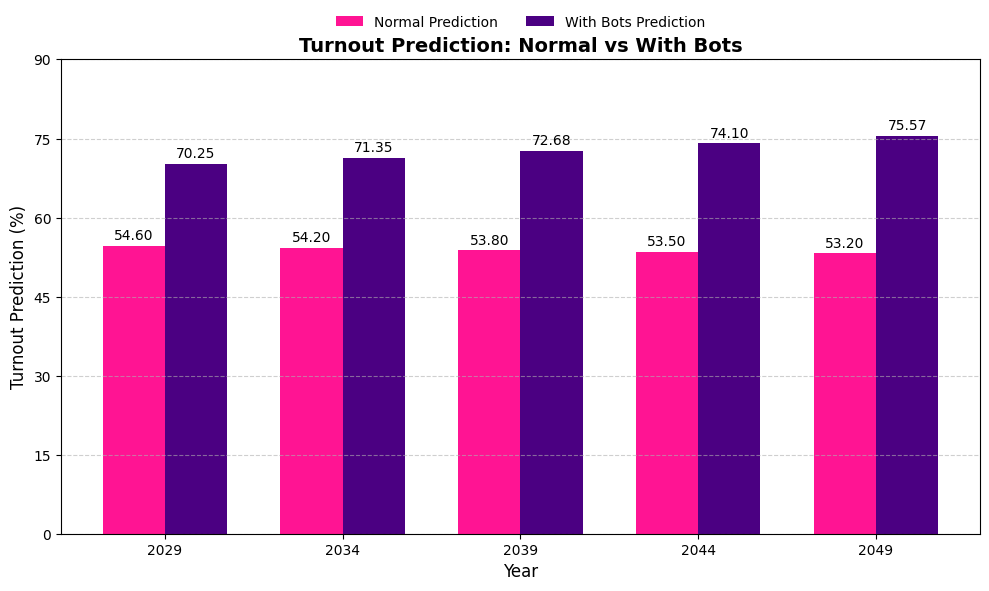

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# reading the excel file and fixing column names for easier use
df = pd.read_excel(r"C:\Users\USER\Downloads\Election_Predictions.xlsx")
df.columns = df.columns.str.strip()
df.rename(columns={
    df.columns[0]: "Year",
    df.columns[1]: "Normal Prediction",
    df.columns[2]: "With Bots Prediction"
}, inplace=True)

# setting up the bar chart
x = np.arange(len(df['Year']))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# two sets of bars: one for normal prediction and one for with-bots prediction
bars1 = ax.bar(x - bar_width/2, df['Normal Prediction'],
               width=bar_width, label="Normal Prediction", color="deeppink")
bars2 = ax.bar(x + bar_width/2, df['With Bots Prediction'],
               width=bar_width, label="With Bots Prediction", color="indigo")

# adjusting y-axis scale (step can be 15 or 20 depending on preference)
YTICK_STEP = 15  # set to 20 if you prefer
max_val = float(max(df['Normal Prediction'].max(), df['With Bots Prediction'].max()))
top_tick = int(np.ceil((max_val + 5) / YTICK_STEP) * YTICK_STEP)  # headroom for labels
ax.set_ylim(0, top_tick)
ax.set_yticks(np.arange(0, top_tick + 1, YTICK_STEP))

# adding the values on top of each bar for clarity
def annotate_bars(bars):
    for b in bars:
        x_pos = b.get_x() + b.get_width()/2
        y_val = b.get_height()
        ax.text(x_pos, y_val + 0.6, f"{y_val:.2f}", ha="center", va="bottom", fontsize=10)

annotate_bars(bars1)
annotate_bars(bars2)

# giving labels, title, and making the chart look clean
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Turnout Prediction (%)", fontsize=12)
ax.set_title("Turnout Prediction: Normal vs With Bots", fontsize=14, weight="bold")
ax.set_xticks(x)
ax.set_xticklabels(df['Year'])
ax.grid(axis="y", linestyle="--", alpha=0.6)

# placing the legend above the plot so it doesn’t clash with labels
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2, frameon=False)

plt.tight_layout()
plt.show()

